# <center> Уравнения эллиптического типа

### Вариант №1

### Условия:

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = -2\frac{\partial u}{\partial x} - 2\frac{\partial u}{\partial y} - 4u$$

$$u(0,y) = e^{-y}\cos y, u(x,0) = e^{-x}\cos x$$

$$u(\frac{\pi}{2},y) = 0,u(x,\frac{\pi}{2}) = 0 $$


$$u^{(k+1)}_{i,j} = \frac{1}{4(1-h^2)}[u^{(k)}_{i+1,j}+u^{(k)}_{i-1,j}+u^{(k)}_{i,j-1}+u^{(k)}_{i,j+1} + h\cdot2(u^{(k)}_{i+1,j} - u^{(k)}_{i-1,j} + u^{(k)}_{i,j+1} - u^{(k)}_{i,j-1}) ] $$

$$u_{i,j}^{(k+1)} = \frac{1}{(4-\frac{4}{h^2})}[-(\frac{1}{h^2}+\frac{1}{h})(u_{i+1,j}^{(k)}+u_{i,j+1}^{(k)}) + (\frac{1}{h} - \frac{1}{h^2})(u_{i-1,j}^{(k)}+u_{i,j-1}^{(k)})]$$

$$u^{(k)}_{0,j} = e^{-y}\cos y; u^{(k)}_{i,0} = e^{-x}\cos x$$

$$u^{(k)}_{N,j} = 0;u^{(k)}_{i,N} = 0 $$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from matplotlib import rcParams
from scipy.interpolate import interp1d
rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma', 'Comic Sans MS', 'Courier', 'Shadow'
rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Times New Roman'

In [5]:
def phi0(y): return np.exp(-y)*np.cos(y)
def phil(x): return np.exp(-x)*np.cos(x)
x0 = 0
xl = m.pi/2
y0 = 0
yl = m.pi/2

In [30]:
def explicit(x0,xl,y0,yl,phi0,phil,N, eps = 0.01):
    h = (xl-x0)/N
    x,y = np.linspace(x0,xl,N),np.linspace(y0,yl,N)
    u = np.zeros((N,N), dtype = 'float64')
    u_x = np.zeros((N,N), dtype = 'float64')
    u_y = np.zeros((N,N), dtype = 'float64')
    u[-1] = np.zeros(N)
    u[::,-1] = np.zeros(N)
    u[0] = phi0(y)
    u[::,0] = phil(x)
    for j in range(1,N-1):
        k = (0-phi0(y[j]))/(xl-x0)
        for i in range(1,N-1):
            u[i][j] = phi0(y[j]) + k*i*h
            
    u_old = np.inf
    k = 0
    while np.max(np.abs(u-u_old)) >= eps:
        u_old = np.copy(u)
        for i in range(1,N-1):
            for j in range(1,N-1):
                u[i][j] = 1/(4 - 4/h/h)*(-(1/h+1/h/h)*u_old[i+1][j] + (1/h - 1/h/h)*u_old[i-1][j] -(1/h+1/h/h)*u_old[i][j+1] + (1/h - 1/h/h)*u_old[i][j-1])
                #u[i][j] = 1/(4 - 4/h/h)*(-(1/h+1/h/h)*u_old[i+1][j] + (1/h - 1/h/h)*u_old[i-1][j] -(1/h+1/h/h)*u_old[i][j+1] + (1/h - 1/h/h)*u_old[i][j-1] - 4*u_old[i][j])
                
        k+=1
    print(k)
    
    for i in range(N):
        for j in range(N):
            if j < N-1:
                u_y[i][j] = (u[i][j+1]-u[i][j])/h
            else:
                u_y[i][j] = (u[i][j]-u[i][j-1])/h
    for i in range(N):
        for j in range(N):
            if i< N-1:
                u_x[i][j] = (u[i+1][j]-u[i][j])/h
            else:
                u_x[i][j] = (u[i][j]-u[i-1][j])/h
                
    
    return {'u':u, 'x':x, 'y': y, 'u_y': u_y, 'u_x': u_x}

Проверить итерационную форму

In [31]:
data = explicit(x0,xl,y0,yl,phi0,phil,10, eps = 1e-5)

130


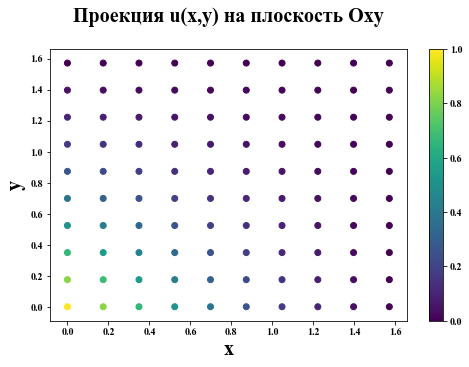

In [32]:
%matplotlib inline
from matplotlib import cm
x_arr,y_arr = np.meshgrid(data['x'],data['y'])
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
x_arr,t_arr = np.meshgrid(data['x'],data['y'])
cont = ax.scatter(x_arr,y_arr, c =  data['u'])
fig.colorbar(cont)
ax.set_title('Проекция u(x,y) на плоскость Oxy\n', size = 20)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('y', size = 20)
plt.show()

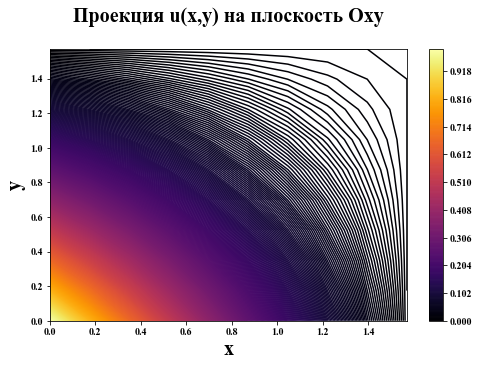

In [33]:
%matplotlib inline
from matplotlib import cm
x_arr,y_arr = np.meshgrid(data['x'],data['y'])
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
cont = ax.contour(x_arr,y_arr, data['u'], 550, cmap=cm.inferno)
fig.colorbar(cont)
ax.set_title('Проекция u(x,y) на плоскость Oxy\n', size = 20)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('y', size = 20)
plt.show()

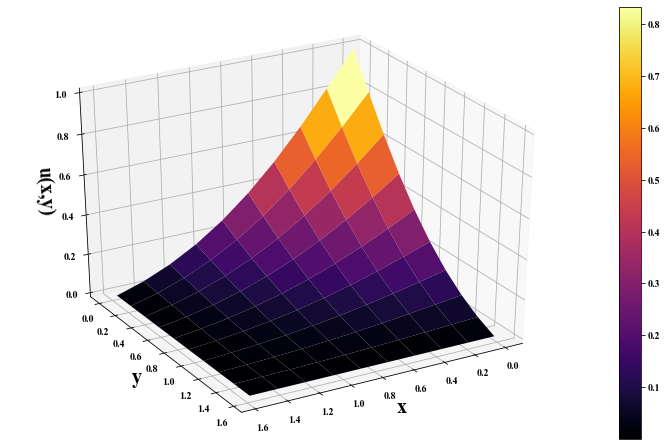

In [34]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,6))
ax = Axes3D(fig)
surf = ax.plot_surface(x_arr, y_arr, data['u'], cmap=cm.inferno, rstride=1, cstride=1)
#ax.set_title('График поверхности u(x,y) \n', size = 25)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('y', size = 20)
ax.set_zlabel('u(x,y)', size = 20)
ax.view_init(30,60)
fig.colorbar(surf)
plt.show()

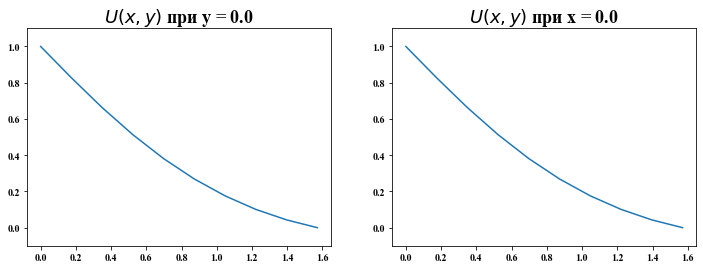

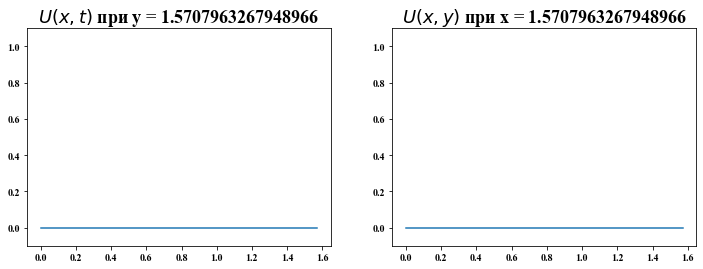

In [29]:
%matplotlib inline
for i in range(0,len(data['u']),10):
    fig = plt.figure(figsize = (12,4)) 
    ax1 = fig.add_subplot(121)
    ax1.set_title('$U(x,y)$ при y = '+str(data['y'][i]),size = 18)
    ax1.plot(data['x'],data['u'][i])
    plt.ylim([-0.1,1.1])
    ax2 = fig.add_subplot(122)
    ax2.set_title('$U(x,y)$ при x = '+str(data['x'][i]),size = 18)
    ax2.plot(data['y'],data['u'][::,i])
    plt.ylim([-0.1,1.1])
fig = plt.figure(figsize = (12,4)) 
ax1 = fig.add_subplot(121)
ax1.set_title('$U(x,t)$ при y = '+str(data['y'][-1]),size = 18)
ax1.plot(data['x'],data['u'][-1])
plt.ylim([-0.1,1.1])
ax2 = fig.add_subplot(122)
ax2.set_title('$U(x,y)$ при x = '+str(data['x'][-1]),size = 18)
ax2.plot(data['y'],data['u'][::,-1])
plt.ylim([-0.1,1.1])
plt.show()